In [58]:
import json
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600
mpl.rcParams['font.size'] = 7

In [25]:
def str_to_datetime(datestr):
    return datetime.strptime(datestr, '%Y-%m-%dT%H:%M:%SZ')

In [55]:
file = open('Report_Json_Session_Report_20230215T103355.json')

FileNotFoundError: [Errno 2] No such file or directory: 'Report_Json_Session_eport_20230215T103355.json'

In [3]:
data = json.load(file)

In [4]:
dat0 = data['DiagnosticData']['LFPTrendLogs']['HemisphereLocationDef.Left']

In [28]:
for i in dat0:
    for j in dat0[i]:
        print(str_to_datetime(j['DateTime']))

2023-02-01 14:52:03
2023-02-01 14:42:03
2023-02-01 14:32:03
2023-02-01 14:22:03
2023-02-01 14:12:03
2023-02-01 14:02:03
2023-02-01 13:52:03
2023-02-01 13:42:03
2023-02-01 13:32:03
2023-02-01 13:22:03
2023-02-01 13:12:03
2023-02-01 13:02:03
2023-02-01 12:52:03
2023-02-01 12:42:03
2023-02-01 12:32:03
2023-02-01 12:22:03
2023-02-01 12:12:03
2023-02-01 12:02:03
2023-02-01 11:52:03
2023-02-01 11:42:03
2023-02-01 11:32:03
2023-02-01 11:22:03
2023-02-01 11:12:02
2023-02-01 11:02:02
2023-02-01 10:52:02
2023-02-01 10:42:02
2023-02-01 10:32:02
2023-02-01 10:22:02
2023-02-01 10:12:02
2023-02-01 10:02:02
2023-02-01 09:52:02
2023-02-01 09:42:02
2023-02-01 09:32:02
2023-02-01 09:22:02
2023-02-01 09:12:02
2023-02-01 09:02:02
2023-02-01 08:52:02
2023-02-01 08:42:02
2023-02-01 08:32:02
2023-02-01 08:22:02
2023-02-01 08:12:02
2023-02-01 08:02:02
2023-02-01 07:52:02
2023-02-01 07:42:02
2023-02-01 07:32:02
2023-02-01 07:22:02
2023-02-01 07:12:02
2023-02-01 07:02:02
2023-02-01 06:52:02
2023-02-01 06:42:02


In [29]:
cnt = 0
arr = [[], []]

for i in dat0:
    for j in dat0[i]:
        arr[0].append(str_to_datetime(j['DateTime']))
        arr[1].append(j['LFP'])

In [47]:
d = {'time':arr[0], 'LFP':arr[1]}
df = pd.DataFrame(data=d)

In [48]:
df

,time,LFP
0,2023-02-01 14:52:03,1793
1,2023-02-01 14:42:03,1898
2,2023-02-01 14:32:03,2192
3,2023-02-01 14:22:03,2872
4,2023-02-01 14:12:03,3123
...,...,...
2003,2023-02-14 15:42:42,2194
2004,2023-02-14 15:32:42,2982
2005,2023-02-14 15:22:42,2408
2006,2023-02-14 15:12:42,2180


In [52]:
df.sort_values(by='time', inplace=True)

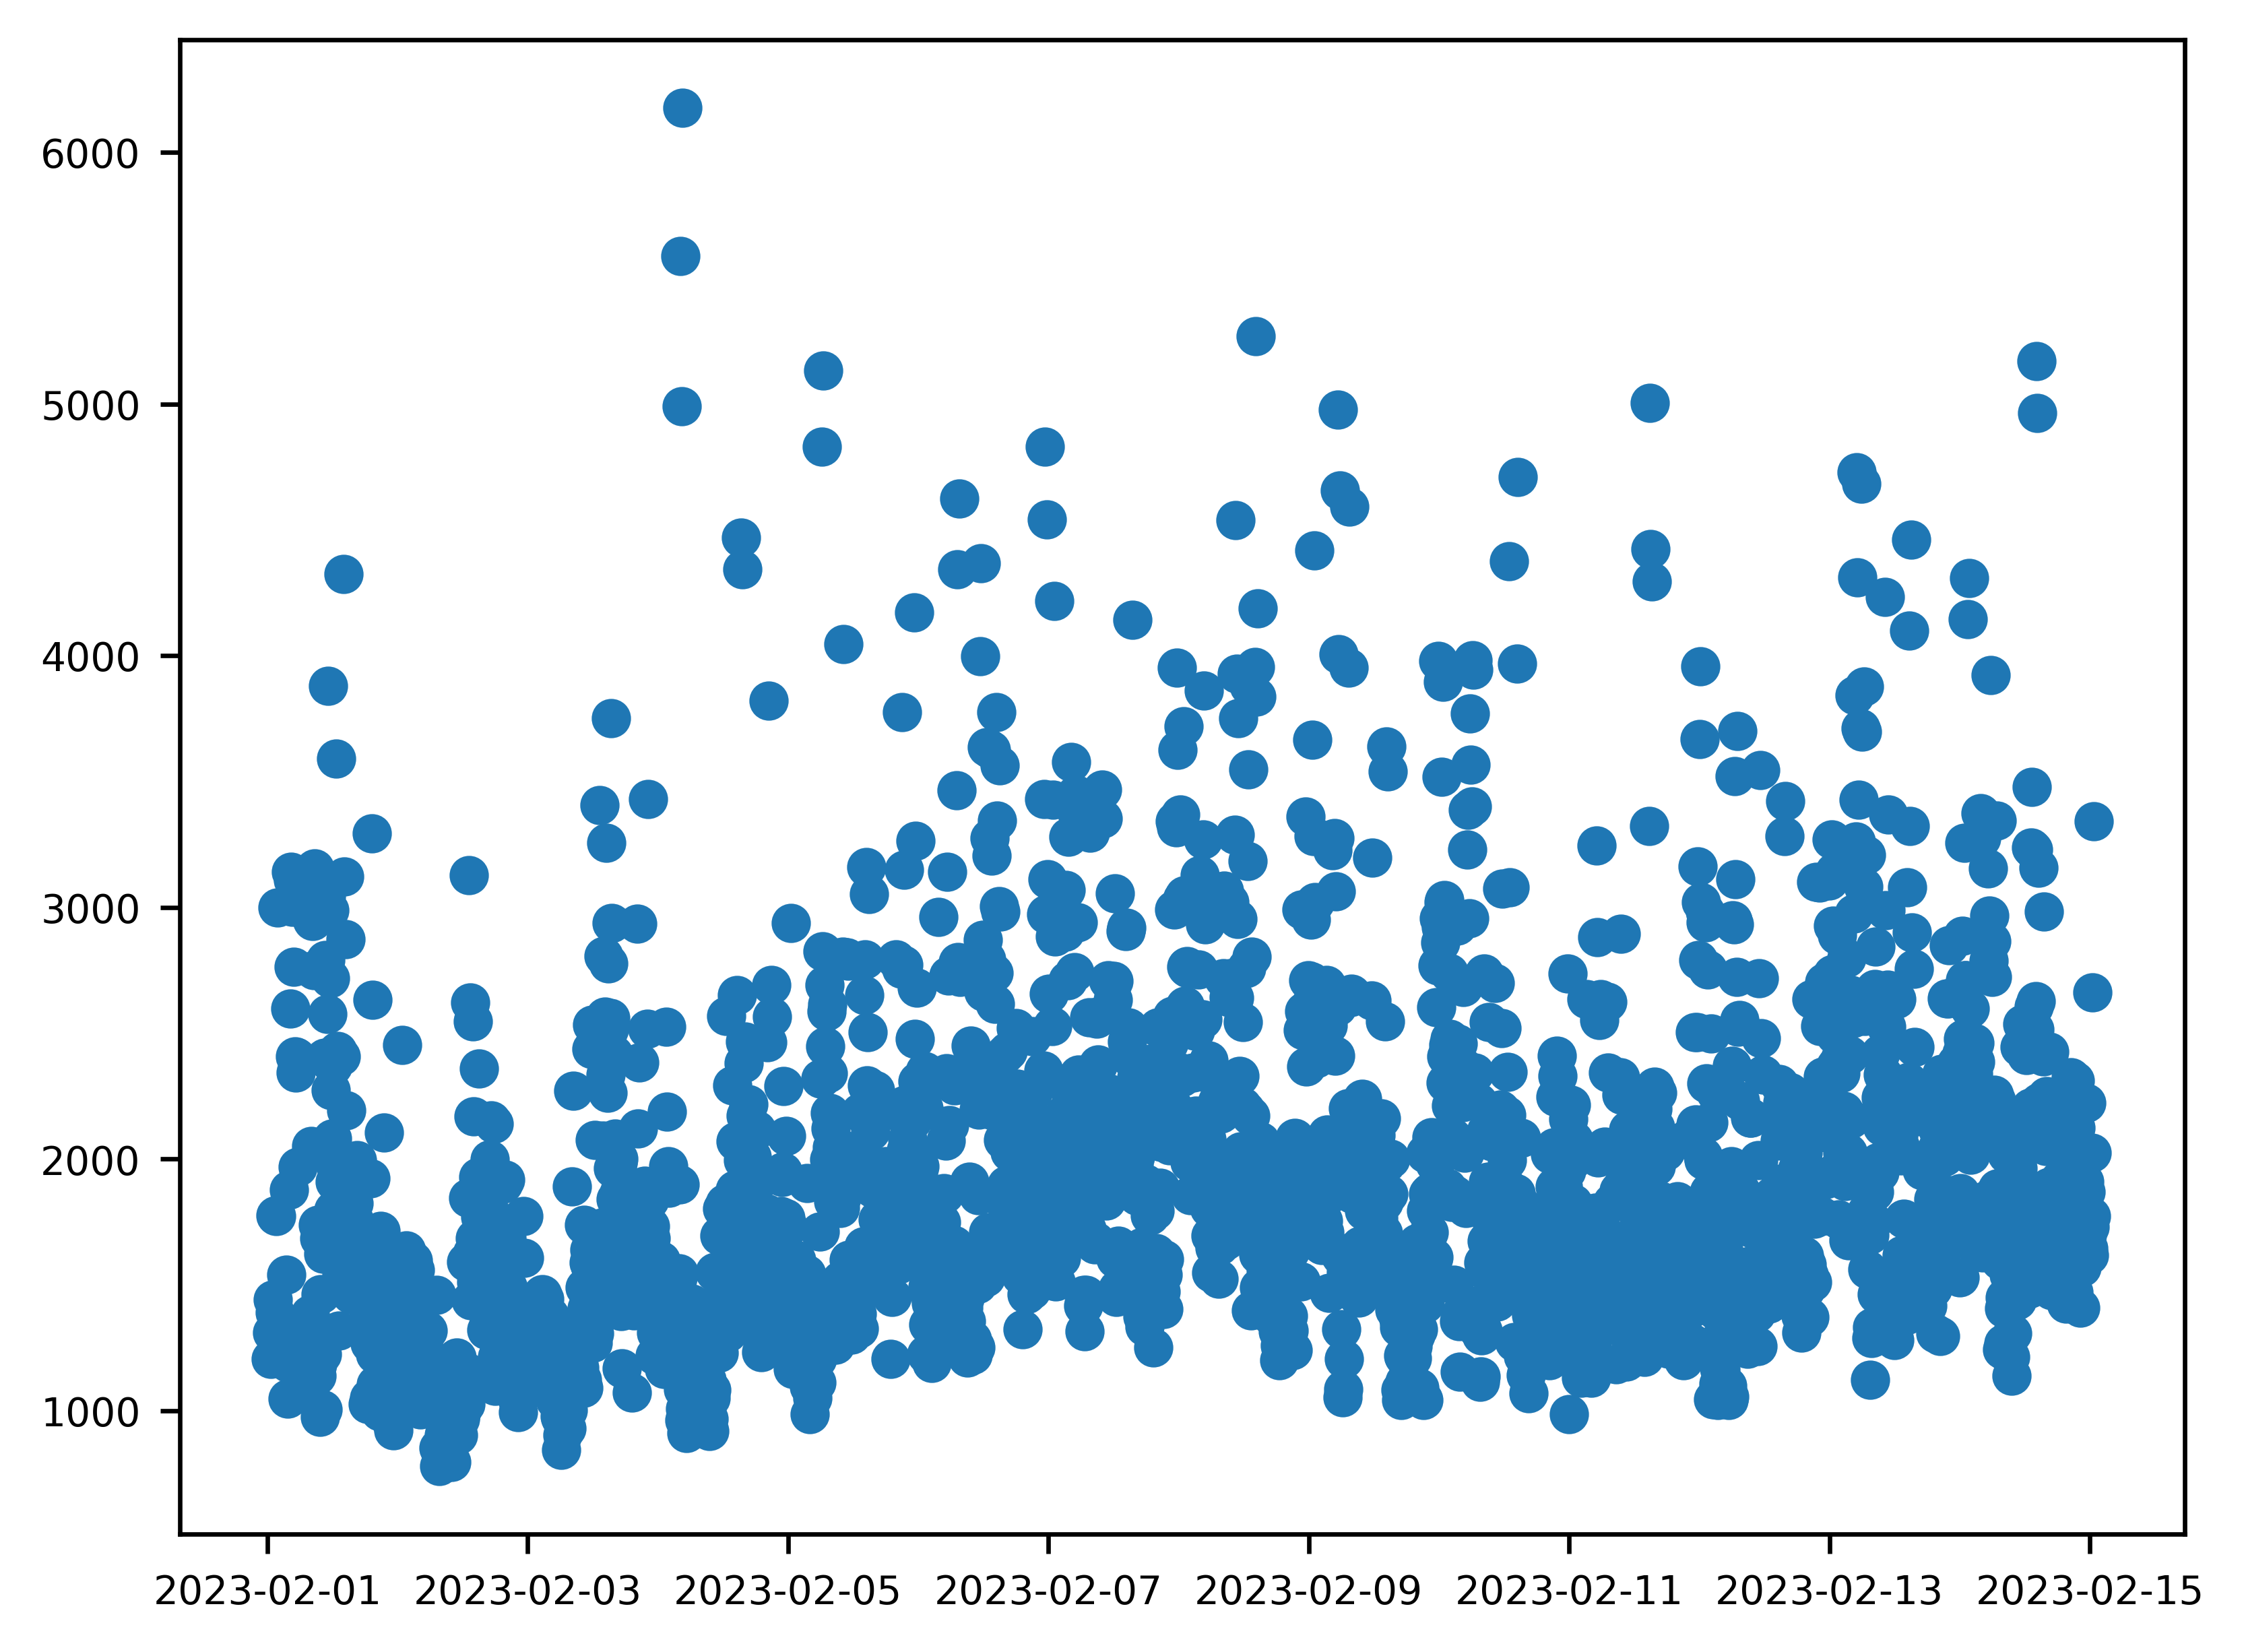

In [59]:
plt.scatter(x=df['time'], y=df['LFP'])

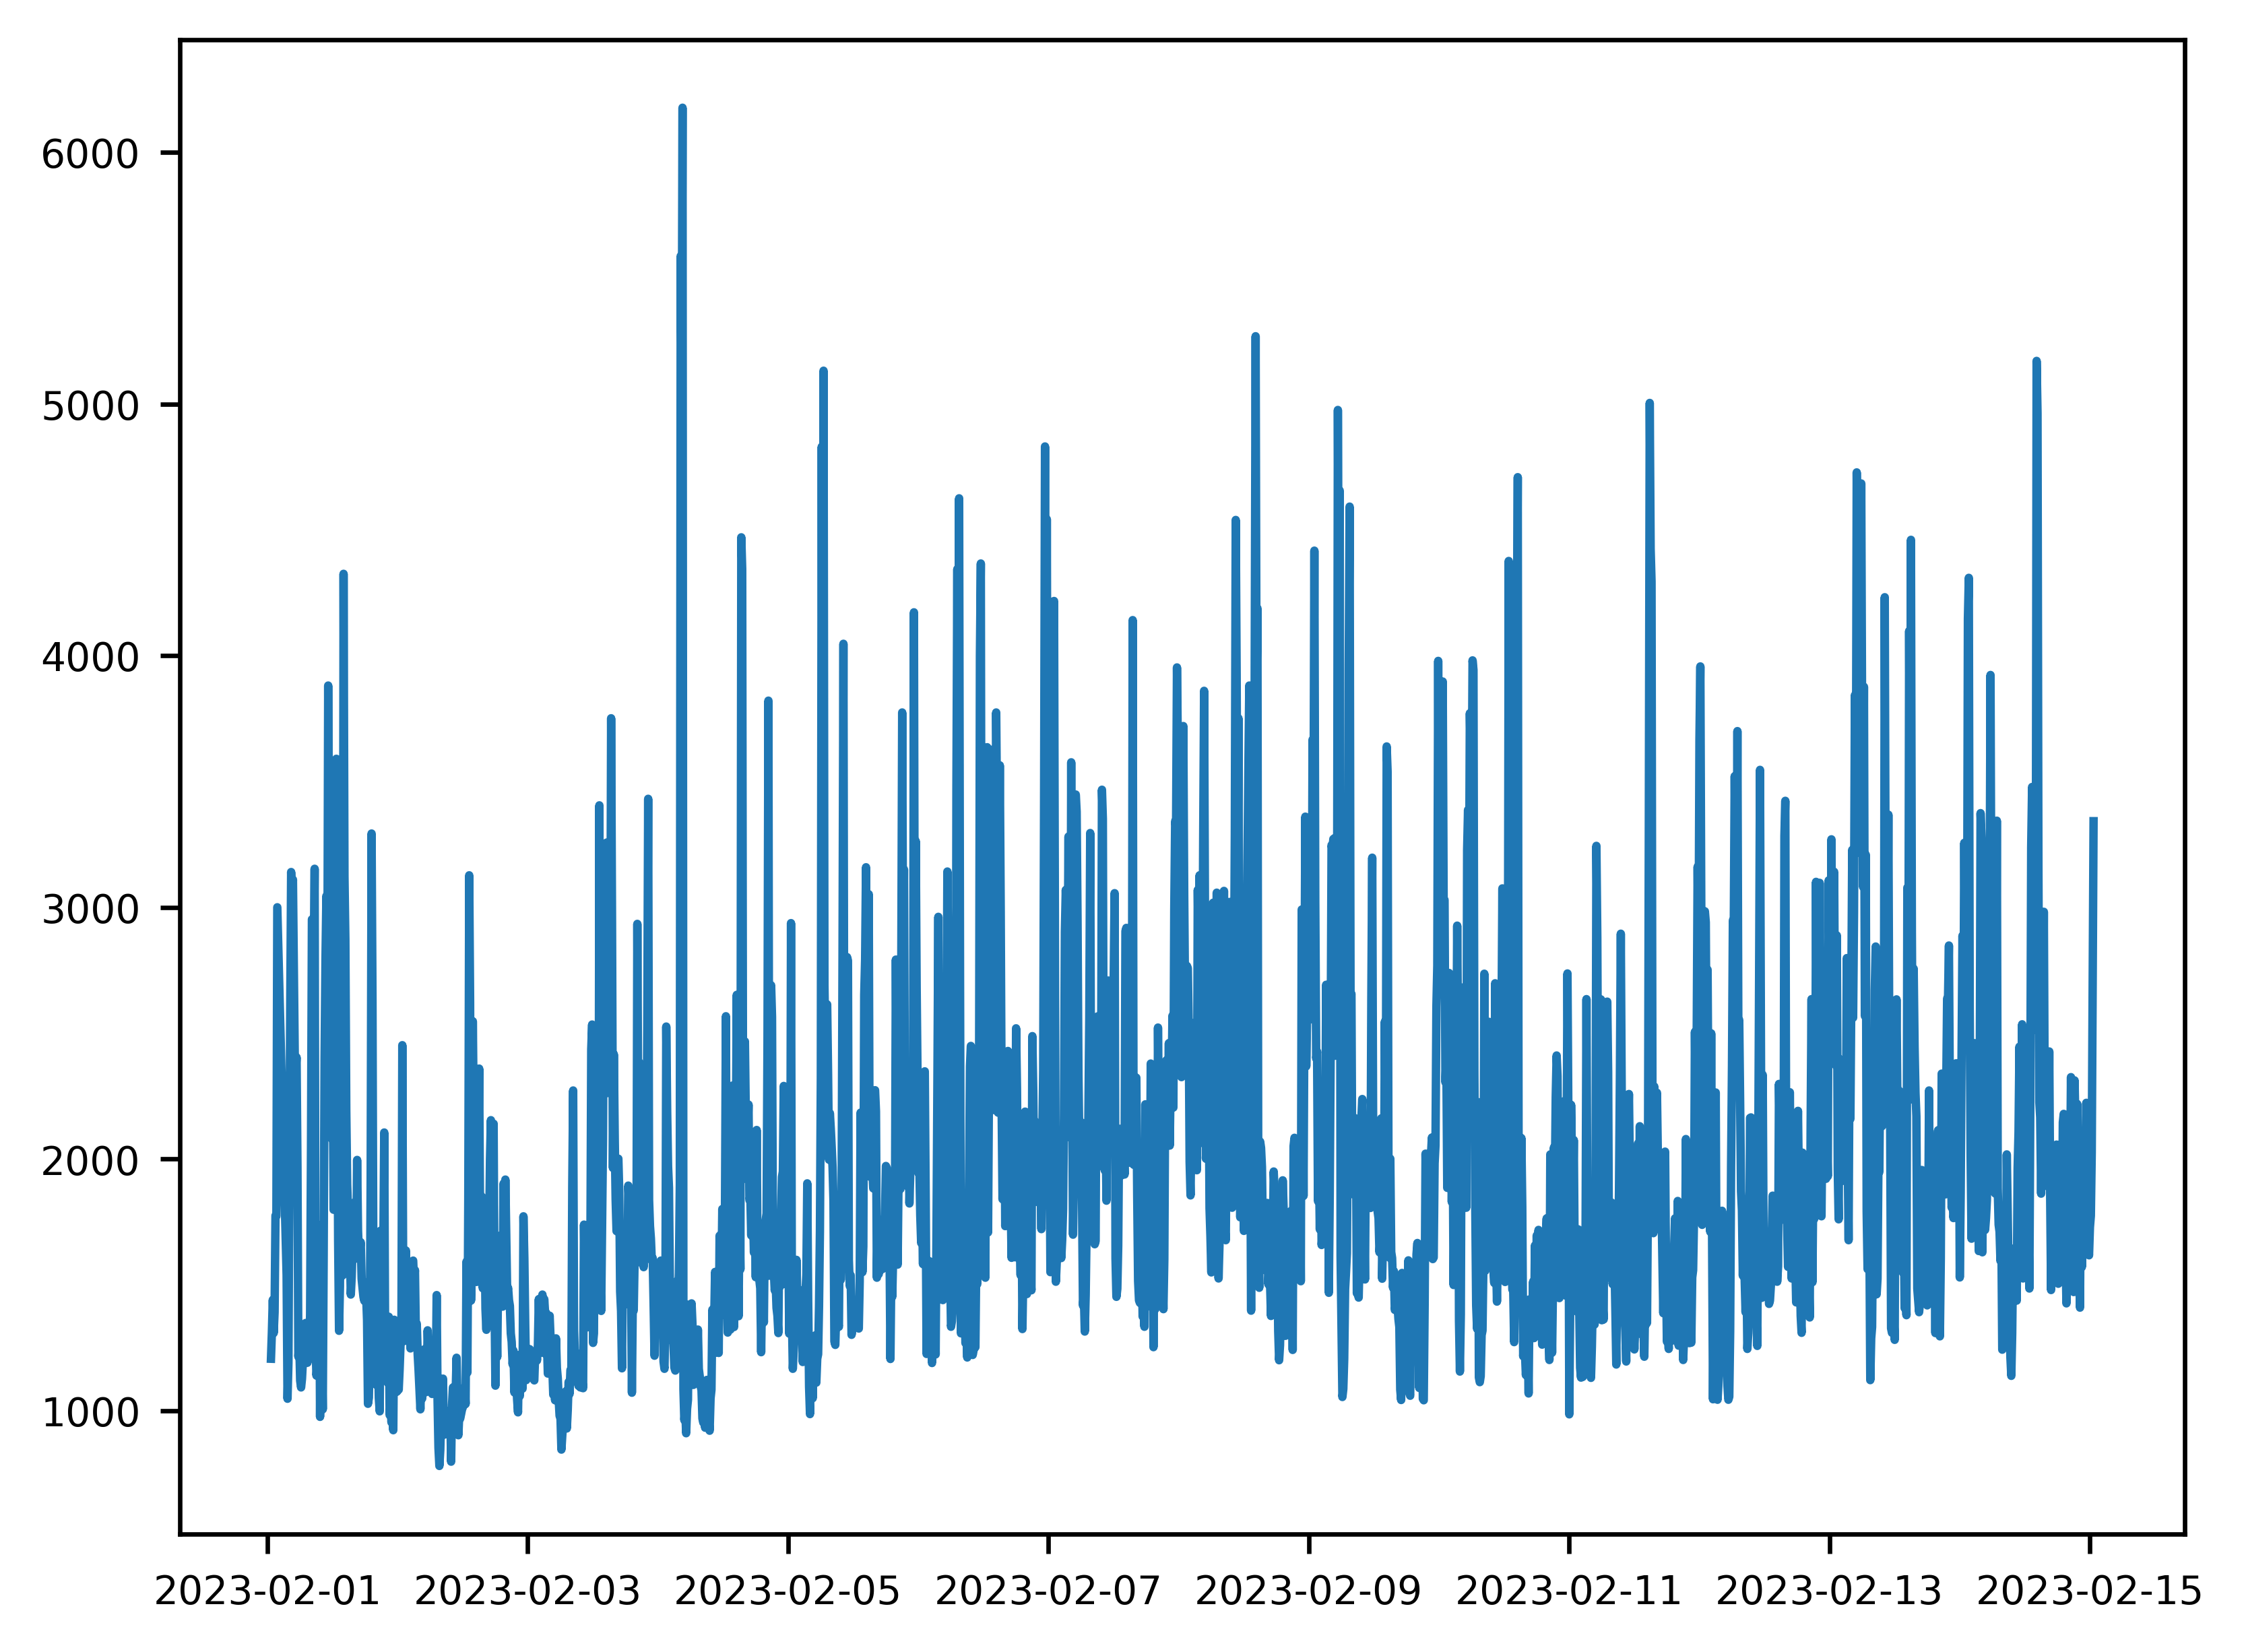

In [60]:
plt.plot(df['time'], df['LFP'])

In [62]:
starttime = input('Enter the start of the range of date to display in the format of YYYY-MM-DD: ')
endtime = input('Enter the end of the range of date to display in the format of YYYY-MM-DD: ')

df['time'] = pd.to_datetime(df['time'])
mask = (df['time'] > starttime) & (df['time'] <= endtime)

newdf = df.loc[mask]

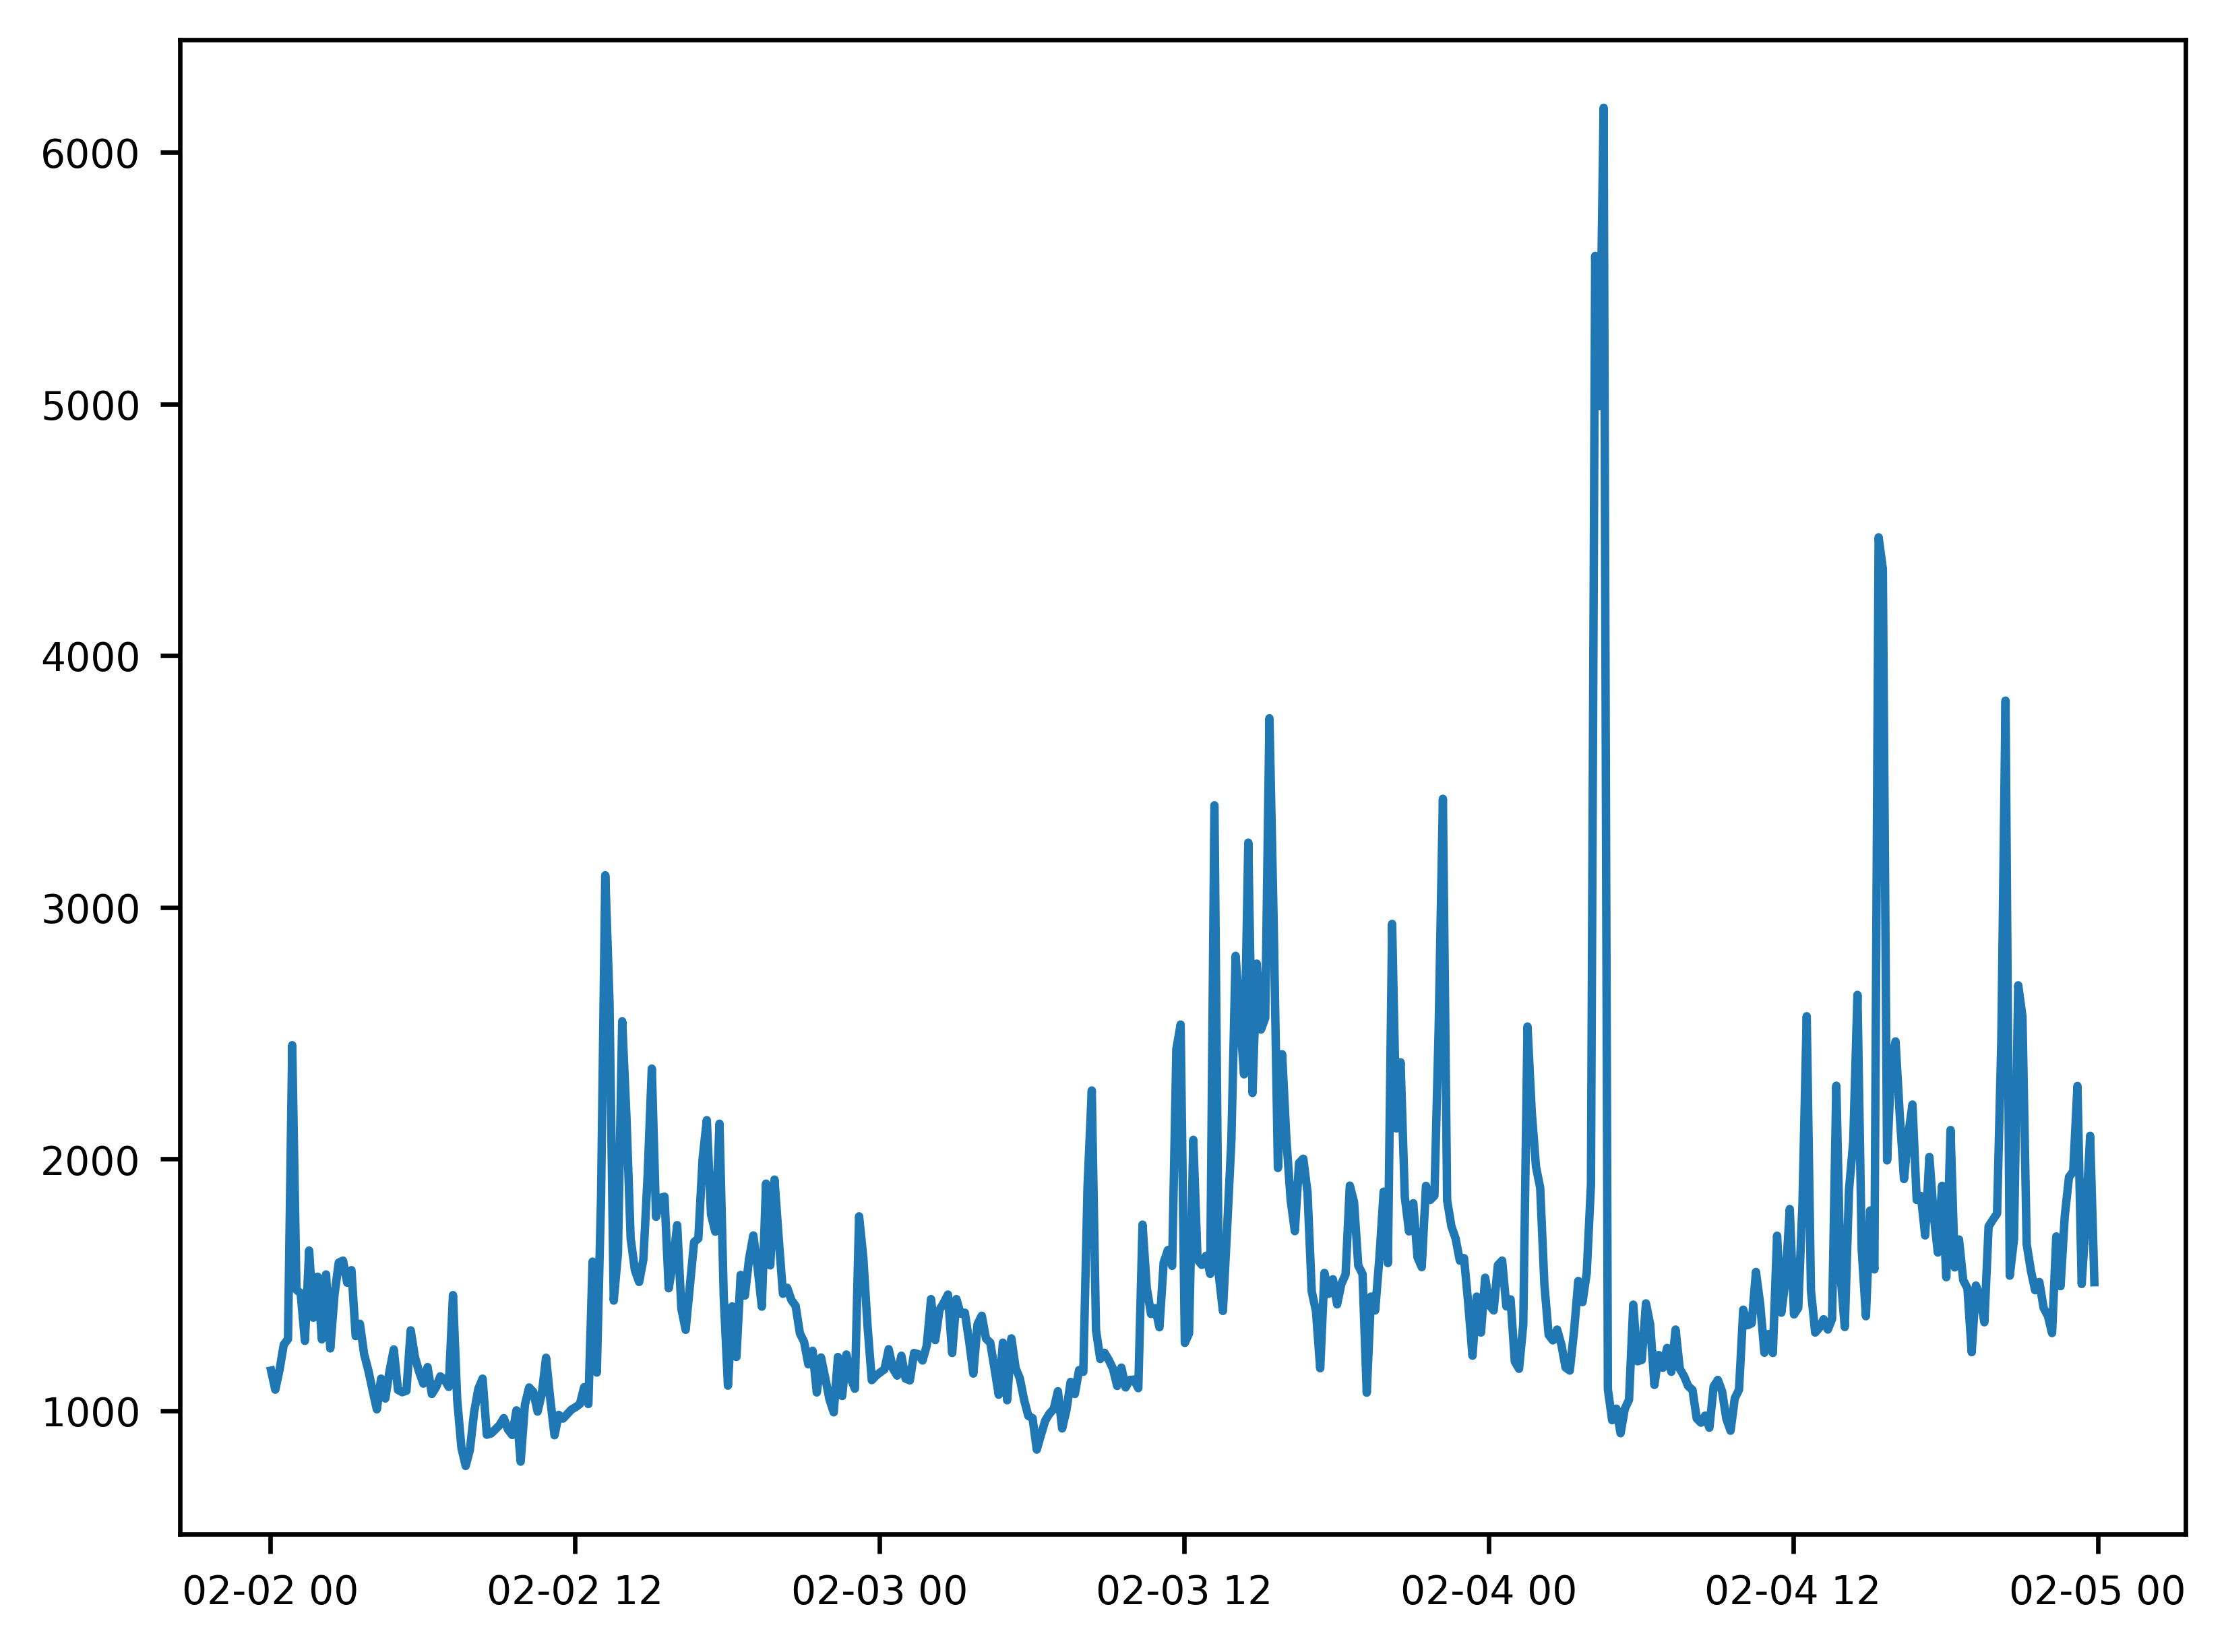

In [63]:
plt.plot(newdf['time'], newdf['LFP'])